In [1]:
from MovieBookAnalysis import *
%matplotlib inline

/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
IMDB_ratings = pd.read_csv('05_15_movie_books_IMDB_ratings.csv', index_col=0)

In [3]:
GR_ratings = pd.read_csv('05_15_movie_books_GR_ratings.csv', index_col=0)

In [4]:
MC_ratings = pd.read_csv('05_15_movie_books_MC_ratings.csv', index_col=0)

In [5]:
dummies = pd.get_dummies(IMDB_ratings.MPAArating)
IMDB_ratings = pd.concat([IMDB_ratings, dummies], axis=1)
IMDB_ratings = IMDB_ratings.rename(columns = {'PG-13':'PG13'})

In [6]:
print(IMDB_ratings.head())

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                       Suzumiya Haruhi no shôshitsu        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4  NOT RATED      163         8.1             3261           NaN   

   IMDBMCRatingCount  APPROVED ...  M  NC-17  NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0 ...  0     

In [7]:
IMDB_and_GR_ratings = IMDB_ratings.merge(GR_ratings, on='Title')
IMDB_and_GR_ratings.to_csv('all_time_movie_books_IMDB_GR_ratings.csv')

In [8]:
print(GR_ratings.head())

                                               Title  GRRating  GRRatingCount
0                            The Wolf of Wall Street      3.64          18175
1                                      Into the Wild      3.92         539534
2                                          Gone Girl      3.99        1240870
3  Going Clear: Scientology and the Prison of Belief      3.99          24468
4                                           The Pact      3.99         211335


In [9]:
print(MC_ratings.head())

                                               Title  MCUserRating  \
0                            The Wolf of Wall Street           7.1   
1                                      Into the Wild           8.2   
2                                          Gone Girl           8.1   
3  Going Clear: Scientology and the Prison of Belief           8.4   
4                                           The Pact           6.7   

   MCUserRatingCount  MCCriticRating  MCCriticRatingCount  
0               1572              75                   47  
1                348              73                   38  
2               1138              79                   49  
3                 49              80                   11  
4                 23              54                   10  


## Compare IMDB user ratings against GR user ratings

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

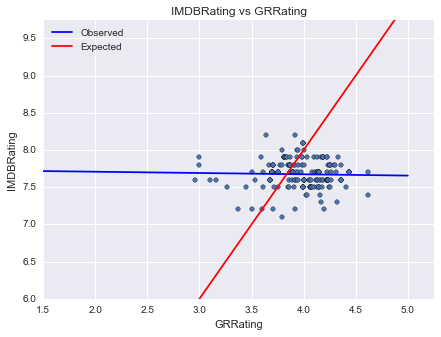

In [10]:
plotMovieRatingAgainstGR(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', ymin=6, ymax=10, xmin=1.5, xmax=5.25, ylim=9.75)

In [11]:
IMDB_GR_OLS = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating')

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

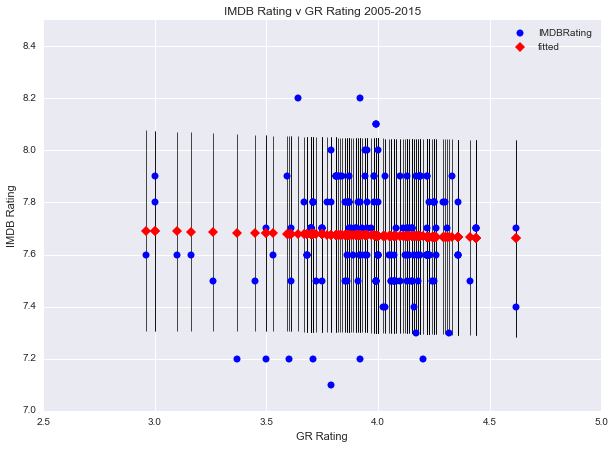

In [12]:
plotByResults(IMDB_GR_OLS, 'IMDB Rating v GR Rating 2005-2015', 'GR Rating', 'IMDB Rating')

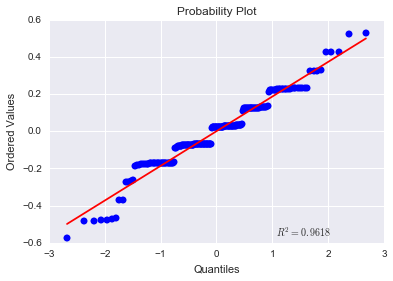

In [13]:
getQQPlot(IMDB_GR_OLS)

In [14]:
IMDB_GR_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1264
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.723
Time:                        16:19:18   Log-Likelihood:                 47.584
No. Observations:                 187   AIC:                            -91.17
Df Residuals:                     185   BIC:                            -84.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7422      0.194     39.814      0.000         7.359     8.126
GRRating      -0.0174      0.049     -0.356      0.723        -0.114     0.079
==============================================================================
Omnibus:                        4.647   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                5.444
Skew:                          -0.161   Prob(JB):                       0.0657
Kurtosis:                       3.771   Cond. No.                         59.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
z_IMDB_GR_movies = getZscoreDiffofMovieAndBook(IMDB_ratings, GR_ratings, 'IMDBRating', 'GRRating', want='bettermovies')
    

/Users/kenn/Learning/ds/metis/projects/luther/ken_m/MovieBookAnalysis.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[(col+'_zscore')] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [16]:
z_IMDB_GR_movies.head(10)

,Title,IMDBRating,GRRating,ZS_diff
187,Wir können auch anders...,7.5,2.00,4.997130
113,Gerónima,7.9,3.00,4.014749
0,The Wolf of Wall Street,8.2,3.64,3.602875
124,My Darling Clementine,7.8,3.00,3.521908
1,Into the Wild,8.2,3.92,2.775826
163,Cavalleria rusticana,7.6,2.96,2.654376
109,The Confession,7.9,3.59,2.272040
156,The Bishop's Wife,7.6,3.10,2.240852
97,The Underground Man,8.0,3.79,2.174132
3,Going Clear: Scientology and the Prison of Belief,8.1,3.99,2.076223


In [17]:
z_IMDB_GR_books = getZscoreDiffofMovieAndBook(IMDB_ratings, GR_ratings, 'IMDBRating', 'GRRating', want='betterbooks')

/Users/kenn/Learning/ds/metis/projects/luther/ken_m/MovieBookAnalysis.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[(col+'_zscore')] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [18]:
z_IMDB_GR_books.head(20)

,Title,IMDBRating,GRRating,ZS_diff
83,Invictus,7.4,4.62,3.234522
90,Paddington,7.2,4.20,2.979631
87,Rise of the Guardians,7.3,4.32,2.841239
86,Testament of Youth,7.3,4.17,2.398177
94,Black Mass,7.1,3.79,2.261436
89,Wild,7.2,3.92,2.152582
178,The Hiding Place,7.5,4.41,2.121394
82,Lincoln,7.4,4.16,1.875799
138,Caliber 9,7.7,4.62,1.755999
175,The Secret of Roan Inish,7.5,4.25,1.648795


## Compare MC user ratings against GR user ratings

                                               Title  MCUserRating  \
0                            The Wolf of Wall Street           7.1   
1                                      Into the Wild           8.2   
2                                          Gone Girl           8.1   
3  Going Clear: Scientology and the Prison of Belief           8.4   
4                                           The Pact           6.7   

   MCUserRatingCount  MCCriticRating  MCCriticRatingCount  GRRating  \
0               1572              75                   47      3.64   
1                348              73                   38      3.92   
2               1138              79                   49      3.99   
3                 49              80                   11      3.99   
4                 23              54                   10      3.99   

   GRRatingCount  
0          18175  
1         539534  
2        1240870  
3          24468  
4         211335  


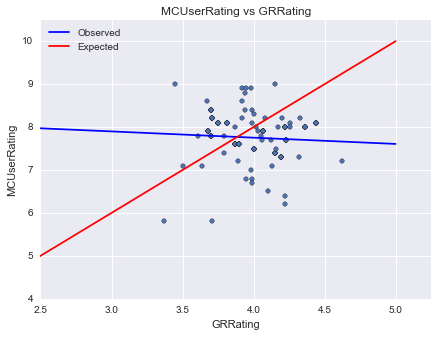

In [19]:
plotMovieRatingAgainstGR(MC_ratings, GR_ratings, 'MCUserRating', col2='GRRating', ymin=4, ymax=10, xmin=2.5, xmax=5.25, ylim=10.5)

In [20]:
MCuser_GR_OLS = getOLSResults(MC_ratings, GR_ratings, 'MCUserRating', col2='GRRating')

                                               Title  MCUserRating  \
0                            The Wolf of Wall Street           7.1   
1                                      Into the Wild           8.2   
2                                          Gone Girl           8.1   
3  Going Clear: Scientology and the Prison of Belief           8.4   
4                                           The Pact           6.7   

   MCUserRatingCount  MCCriticRating  MCCriticRatingCount  GRRating  \
0               1572              75                   47      3.64   
1                348              73                   38      3.92   
2               1138              79                   49      3.99   
3                 49              80                   11      3.99   
4                 23              54                   10      3.99   

   GRRatingCount  
0          18175  
1         539534  
2        1240870  
3          24468  
4         211335  
MCUserRating ~ GRRating


In [21]:
MCuser_GR_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MCUserRating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2643
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.608
Time:                        16:19:18   Log-Likelihood:                -117.95
No. Observations:                 109   AIC:                             239.9
Df Residuals:                     107   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.3355      1.131      7.368      0.000         6.093    10.578
GRRating      -0.1457      0.283     -0.514      0.608        -0.707     0.416
==============================================================================
Omnibus:                       79.750   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.508
Skew:                          -2.344   Prob(JB):                    1.10e-135
Kurtosis:                      13.718   Cond. No.                         69.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## IMDB fit with other categories

In [22]:
IMDB_w_runtime = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='Runtime')

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

In [23]:
IMDB_w_runtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5000
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.607
Time:                        16:19:18   Log-Likelihood:                 46.009
No. Observations:                 182   AIC:                            -86.02
Df Residuals:                     179   BIC:                            -76.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.6967      0.201     38.221      0.000         7.299     8.094
GRRating      -0.0195      0.049     -0.397      0.692        -0.116     0.077
Runtime        0.0005      0.001      0.941      0.348        -0.001     0.001
==============================================================================
Omnibus:                        5.119   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                5.681
Skew:                          -0.223   Prob(JB):                       0.0584
Kurtosis:                       3.742   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
IMDB_w_G = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='G')
IMDB_w_G.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4787
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.620
Time:                        16:19:19   Log-Likelihood:                 48.006
No. Observations:                 187   AIC:                            -90.01
Df Residuals:                     184   BIC:                            -80.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7837      0.200     38.959      0.000         7.390     8.178
GRRating      -0.0285      0.050     -0.567      0.572        -0.128     0.071
G              0.0606      0.066      0.912      0.363        -0.071     0.192
==============================================================================
Omnibus:                        4.760   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                5.775
Skew:                          -0.149   Prob(JB):                       0.0557
Kurtosis:                       3.808   Cond. No.                         61.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
IMDB_w_PG = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='PG')
IMDB_w_PG.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2231
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.800
Time:                        16:19:19   Log-Likelihood:                 47.747
No. Observations:                 187   AIC:                            -89.49
Df Residuals:                     184   BIC:                            -79.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7208      0.198     38.905      0.000         7.329     8.112
GRRating      -0.0111      0.050     -0.221      0.825        -0.110     0.088
PG            -0.0219      0.039     -0.566      0.572        -0.098     0.054
==============================================================================
Omnibus:                        4.470   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                5.168
Skew:                          -0.156   Prob(JB):                       0.0755
Kurtosis:                       3.752   Cond. No.                         60.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
IMDB_w_PG13 = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='PG13')
IMDB_w_PG13.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3008
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.741
Time:                        16:19:19   Log-Likelihood:                 47.825
No. Observations:                 187   AIC:                            -89.65
Df Residuals:                     184   BIC:                            -79.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7581      0.196     39.564      0.000         7.371     8.145
GRRating      -0.0201      0.049     -0.411      0.682        -0.117     0.077
PG13          -0.0238      0.034     -0.690      0.491        -0.092     0.044
==============================================================================
Omnibus:                        4.815   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.612
Skew:                          -0.176   Prob(JB):                       0.0604
Kurtosis:                       3.773   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
IMDB_w_R = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='Gross', col3='Budget')
IMDB_w_R.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8525
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.431
Time:                        16:19:19   Log-Likelihood:                 12.172
No. Observations:                  73   AIC:                            -18.34
Df Residuals:                      70   BIC:                            -11.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.6261      0.042    180.351      0.000         7.542     7.710
Gross       4.986e-10   4.08e-10      1.221      0.226     -3.16e-10  1.31e-09
Budget     -4.546e-10   6.31e-10     -0.720      0.474     -1.71e-09  8.04e-10
==============================================================================
Omnibus:                        3.489   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.649
Skew:                           0.027   Prob(JB):                        0.161
Kurtosis:                       4.094   Cond. No.                     1.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
IMDB_w_R_Gross = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col3='Budget')
IMDB_w_R_Gross.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.378
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.258
Time:                        16:19:19   Log-Likelihood:                 18.032
No. Observations:                  82   AIC:                            -30.06
Df Residuals:                      79   BIC:                            -22.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.2545      0.377     21.885      0.000         7.504     9.005
GRRating      -0.1552      0.097     -1.599      0.114        -0.348     0.038
Budget       1.23e-10   6.16e-10      0.200      0.842      -1.1e-09  1.35e-09
==============================================================================
Omnibus:                        7.607   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               12.584
Skew:                          -0.245   Prob(JB):                      0.00185
Kurtosis:                       4.856   Cond. No.                     1.02e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
IMDB_w_RuntimeR = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='Runtime', col4='R')
IMDB_w_RuntimeR.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7466
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.526
Time:                        16:19:19   Log-Likelihood:                 46.640
No. Observations:                 182   AIC:                            -85.28
Df Residuals:                     178   BIC:                            -72.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7056      0.201     38.260      0.000         7.308     8.103
GRRating      -0.0248      0.049     -0.502      0.616        -0.122     0.073
Runtime        0.0007      0.001      1.239      0.217        -0.000     0.002
R             -0.0369      0.033     -1.113      0.267        -0.102     0.029
==============================================================================
Omnibus:                        4.430   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.843
Skew:                          -0.187   Prob(JB):                       0.0888
Kurtosis:                       3.707   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
IMDB_w_RuntimeR = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='Runtime', col4='G', col5='PG', col6='PG13', col7='R')
IMDB_w_RuntimeR.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.057
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.391
Time:                        16:19:19   Log-Likelihood:                 48.740
No. Observations:                 182   AIC:                            -83.48
Df Residuals:                     175   BIC:                            -61.05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7141      0.209     36.895      0.000         7.301     8.127
GRRating      -0.0241      0.052     -0.459      0.647        -0.128     0.079
Runtime        0.0008      0.001      1.543      0.125        -0.000     0.002
G              0.0214      0.071      0.303      0.762        -0.118     0.161
PG            -0.0601      0.044     -1.357      0.176        -0.148     0.027
PG13          -0.0660      0.040     -1.639      0.103        -0.145     0.013
R             -0.0713      0.039     -1.830      0.069        -0.148     0.006
==============================================================================
Omnibus:                        3.970   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                4.272
Skew:                          -0.161   Prob(JB):                        0.118
Kurtosis:                       3.678   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
IMDBrating_v_R = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='Budget')
IMDBrating_v_R.summary()

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.378
Date:                Tue, 26 Jan 2016   Prob (F-statistic):              0.258
Time:                        16:19:19   Log-Likelihood:                 18.032
No. Observations:                  82   AIC:                            -30.06
Df Residuals:                      79   BIC:                            -22.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.2545      0.377     21.885      0.000         7.504     9.005
GRRating      -0.1552      0.097     -1.599      0.114        -0.348     0.038
Budget       1.23e-10   6.16e-10      0.200      0.842      -1.1e-09  1.35e-09
==============================================================================
Omnibus:                        7.607   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               12.584
Skew:                          -0.245   Prob(JB):                      0.00185
Kurtosis:                       4.856   Cond. No.                     1.02e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
log_df = getMergedDf(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3 = 'Budget')[0]

                                               Title     Budget      Gross  \
0                            The Wolf of Wall Street  100000000  116866727   
1                                      Into the Wild   15000000   18352454   
2                                          Gone Girl   61000000  167735396   
3  Going Clear: Scientology and the Prison of Belief        NaN        NaN   
4                                           The Pact        NaN        NaN   

  MPAArating  Runtime  IMDBRating  IMDBRatingCount  IMDBMCRating  \
0          R      180         8.2           705753           NaN   
1          R      148         8.2           401238           NaN   
2          R      149         8.1           517073           NaN   
3  NOT RATED      119         8.1            19936           NaN   
4        NaN       84         8.1               31           NaN   

   IMDBMCRatingCount  APPROVED      ...        NOT RATED  PASSED  PG  PG13  R  \
0                NaN         0      ...  

In [33]:
log_df = log_df[log_df.GRRating > 2.25]

In [34]:
'''N, M = 10,10
fig, ax = plt.subplots(figsize=(N, M))
plt.scatter(np.log(log_df.GRRating),log_df.IMDBRating)
plt.ylabel("IMDB Rating")
plt.xlabel("Log(GRRating)")
plt.title("")'''

'N, M = 10,10\nfig, ax = plt.subplots(figsize=(N, M))\nplt.scatter(np.log(log_df.GRRating),log_df.IMDBRating)\nplt.ylabel("IMDB Rating")\nplt.xlabel("Log(GRRating)")\nplt.title("")'